# Assignment 2: Exploratory Data Analysis and K Nearest Neighbors Classification

For this assignment you will perform exploratory data analysis to visualize Fisher’s Iris dataset using Scikit Learn. And, you will explore the bias/variance trade-off by applying k-nearest neighbors classification to the Iris dataset and varying the hyperparameter k.

Documentation for Scikit Learn:
+ The top level documenation page is here: https://scikit-learn.org/stable/index.html
+ The API for the KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
+ The User Guide for KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/neighbors.html#classification
+ Scikit Learn provides many Jupyter notebook examples on how use the toolkit. These Jupyter notebook examples can be run on MyBinder: https://scikit-learn.org/stable/auto_examples/index.html

For more information about the Iris dataset, see this page https://en.wikipedia.org/wiki/Iris_flower_data_set.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from pandas import DataFrame

Load Iris dataset

In [3]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [4]:
print("Number of instances in the iris dataset:", X.shape[0])
print("Number of features in the iris dataset:", X.shape[1])
print("The dimension of the data matrix X is", X.shape)

Number of instances in the iris dataset: 150
Number of features in the iris dataset: 4
The dimension of the data matrix X is (150, 4)


In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

The `y` vector length is 150. It has three unique values: 0, 1 and 2. Each value represents a species of iris flower.

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
y.shape

(150,)

In [8]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Extension: Show the summary table of iris data including min, max, median, quantiles

In [11]:
iris_df = DataFrame(iris.data, columns=iris.feature_names,index=pd.Index([i for i in range(iris.data.shape[0])])).join(DataFrame(iris.target, columns=pd.Index(["species"]), index=pd.Index([i for i in range(iris.target.shape[0])])))
iris_df.species.replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)


In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Part 1Exploratory Data Analysis
### Part 1a
Generate [scatter plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) using each pair of the attributes as axis. You should generate $6 = {4 \choose 2}$ scatter plots.

/var/folders/f8/hyk9jhbs4fz520380cc_dm740000gn/T/ipykernel_3794/2887965274.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,6)


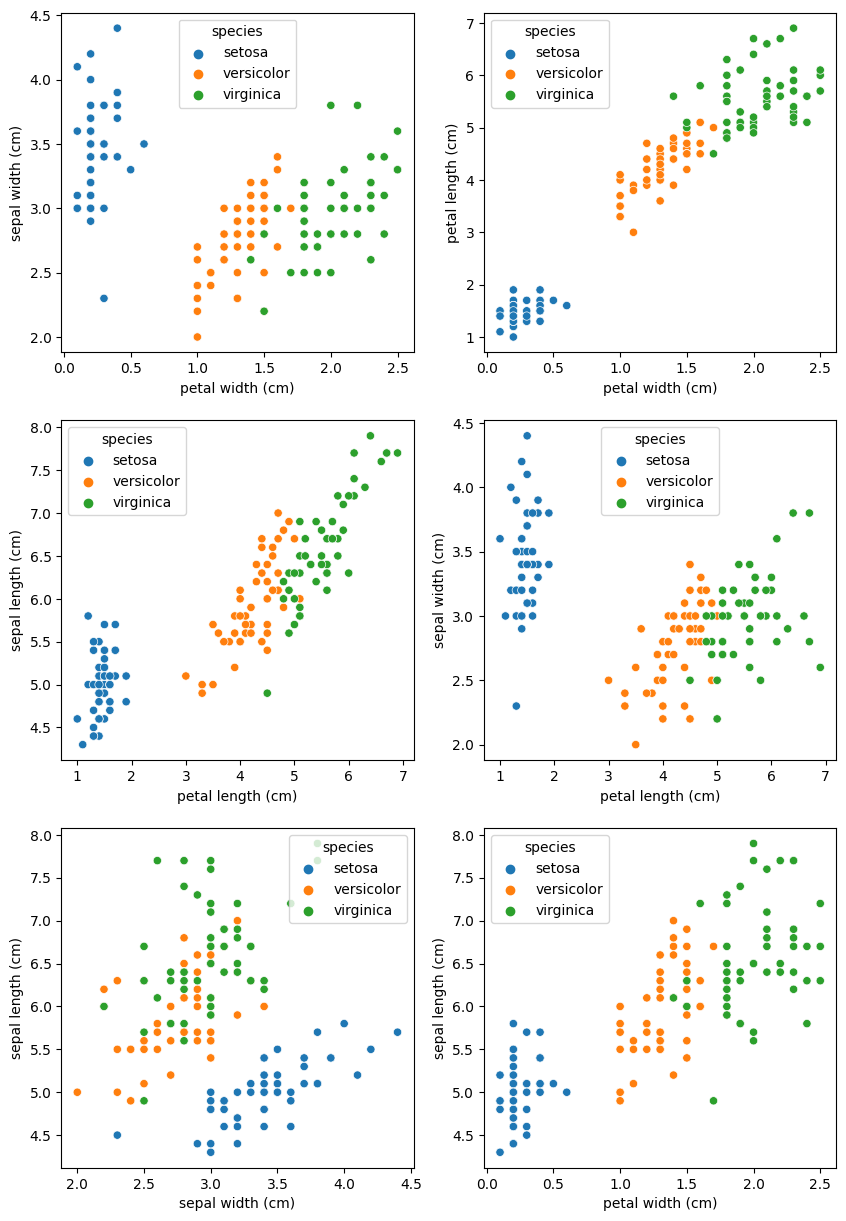

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,15))
k=1
sns.scatterplot( data=iris_df, x=iris.feature_names[3], y=iris.feature_names[0],hue='species')
plt.subplot(3,2,6)
for i in range(3,0,-1):
    for j in range(i):    
        sns.scatterplot(x=iris.feature_names[i], y=iris.feature_names[j],hue='species', data=iris_df )
        plt.subplot(3,2,k)
        k+=1

plt.show()

### Extension: Draw a boxplot of sepal length (cm), sepal width (cm), petal length (cm), petal width (cm). Use color to show the different target class.

Some links to help you: 

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

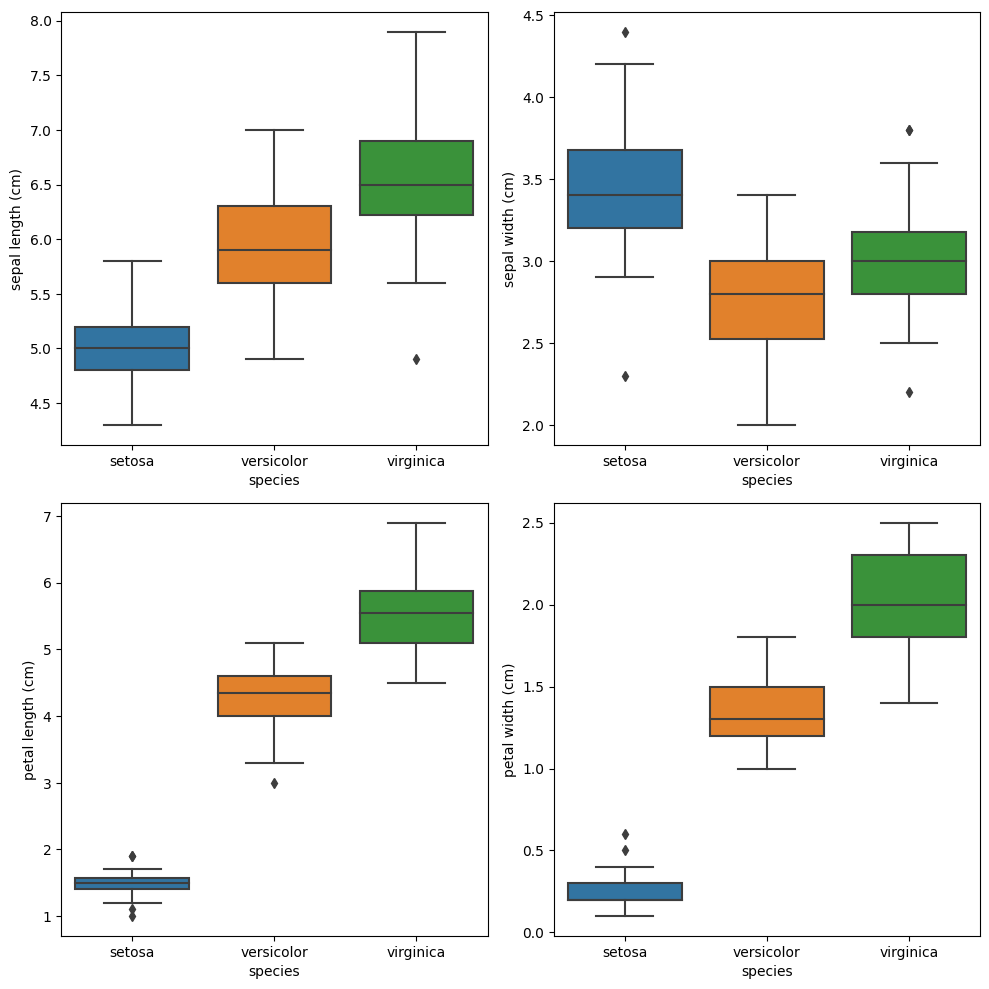

In [14]:

fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
row = 0
col = 0
for i in range(len(iris_df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_df['species'], y = iris_df[iris_df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

### Part 1b
If you were to draw linear decision boundaries to separate the classes, which scatter plot do you think will have the least error and which the most?

I think the petal width and petal length one has least error. In the graph we can clearly see that the blue is seperate from green and orange. And there's kind of a line with small error between orange and green. 

For the most error one, I would choose the sepal width and sepal length one. For this one, blue is really close to green and orange, and green and orange are blend together. I think to draw a line between orange and green will cause a lot of errors. 

### Part 1c
Scatter plots using two attributes of the data are equivalent to project the four dimensional data down to two dimensions using axis-parallel projection. Principal component analysis (PCA) is a technique to linearly project the data to lower dimensions that are not necessarily axis-parallel. Use PCA to project the data down to two dimensions.

Documentation for PCA:
+ API https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
+ User guide https://scikit-learn.org/stable/modules/decomposition.html#pca

Text(0.5, 1.0, 'PCA of IRIS dataset')

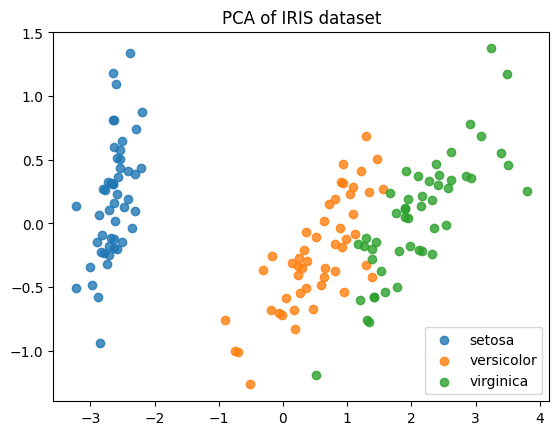

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit(X).transform(X)
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.8, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

### In the case of the Iris dataset, does PCA do a better job of separating the classes?

I believe that PCA somehow did a better job in separating the classes. For example, we can see that the blue(setosa) class is away from other two classes, which we can definitely draw a line in between to separate the blue class. For other two classes, there are still some overlap errors between green and orange class.

## Part 2 K Nearest Neighbor

Split the dataset into train set and test set. Use 67 percent of the dataset for training, and use 33 percent for testing.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [17]:
print("Number of instances in the train set:", X_train.shape[0])
print("Number of instances in the test set:", X_test.shape[0])

Number of instances in the train set: 100
Number of instances in the test set: 50


### Part 2a Create a KNeibhorsClassifier with `n_neighbors = 5`. And, train the classifier using the train set.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 5
X1= X_train[:, :2]
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

In [19]:
print("Using", n_neighbors, "neighbors:")
print("The train accuracy score is:", train_score)
print("The test accuracy score is :", test_score)

Using 5 neighbors:
The train accuracy score is: 0.96
The test accuracy score is : 0.98


### Part 2b Tuning hyperparameter k
As we have seen in class, hyperparameter k of the K Nearest Neighbors classification affects the inductive bias. For this part train multiple near neighbor classifier models, store the results in a DataFrame. The plot plot training error and testing error versus N/k, where N = 100.

### Extension: Use different metric for knn classification. 
    - 1). Euclidean distance 
    - 2). Manhattan distance 
    - 3). Chebyshev distance.
    

Distance Metrics Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics
 

In [20]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]
train = []
test = []

In [21]:
### Insert your code
# Use the `result` to store the DataFrame
# euclidean
from sklearn.metrics import pairwise_distances

train=[]
test= []
for k in k_list:
    
    clf = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    train.append(1-train_score)

    test_score = clf.score(X_test, y_test)
    test.append(1-test_score)



    

result = pd.DataFrame({'N/k': [ 100/x for x in k_list ],'train error': train, 'test error': test})

<AxesSubplot: xlabel='N/k', ylabel='error'>

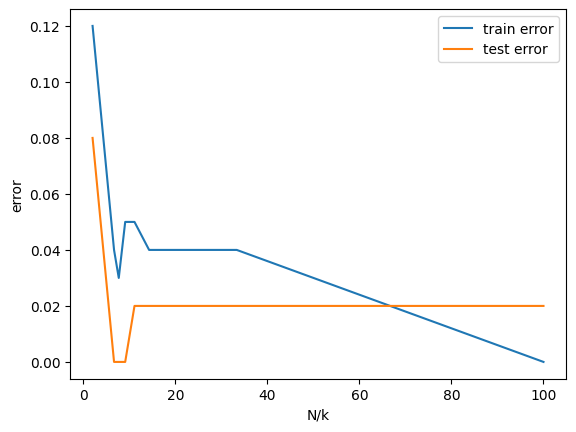

In [22]:
result.plot(x='N/k', y=['train error', 'test error'], ylabel='error')

In [23]:

# manhattan
train=[]
test= []
for k in k_list:
    
    clf = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    train.append(1-train_score)

    test_score = clf.score(X_test, y_test)
    test.append(1-test_score)



    

result = pd.DataFrame({'N/k': [ 100/x for x in k_list ],'train error': train, 'test error': test})

<AxesSubplot: xlabel='N/k', ylabel='error'>

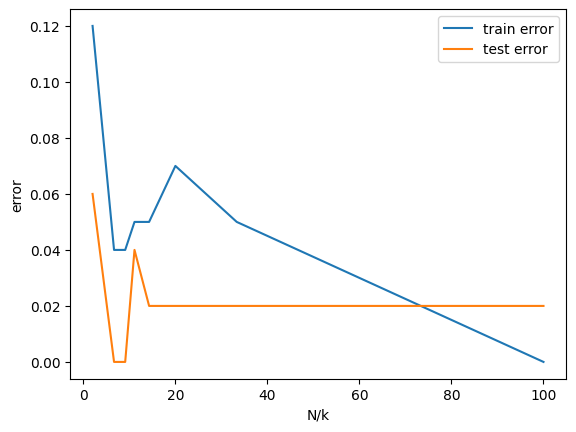

In [24]:
result.plot(x='N/k', y=['train error', 'test error'], ylabel='error')

In [25]:

# chebyshev

train=[]
test= []
for k in k_list:
    
    clf = KNeighborsClassifier(n_neighbors = k, metric = 'chebyshev')
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    train.append(1-train_score)

    test_score = clf.score(X_test, y_test)
    test.append(1-test_score)



    

result = pd.DataFrame({'N/k': [ 100/x for x in k_list ],'train error': train, 'test error': test})

<AxesSubplot: xlabel='N/k', ylabel='error'>

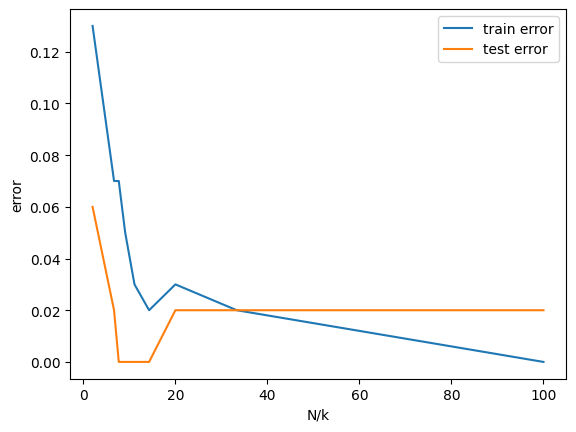

In [30]:
result.plot(x='N/k', y=['train error', 'test error'], ylabel='error')

### Part 2c Plot decision boundaries of K Nearest Neighbors
Use Scikit Learn's [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay) class to visualize the nearest neighbor boundaries as k is varied.

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay

In [27]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

Simplify the problem by using only the first 2 attributes of the dataset

In [28]:
X2 = X_train[:, :2]


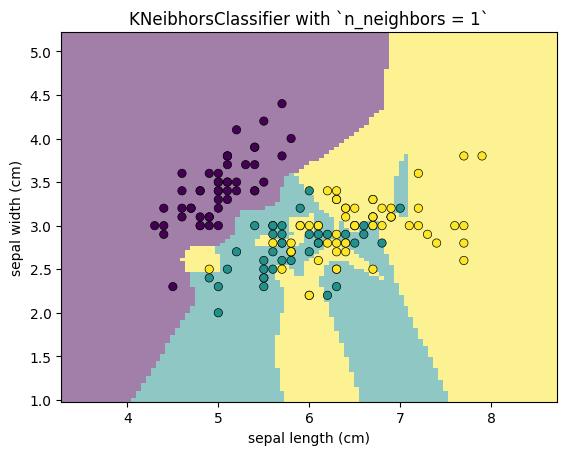

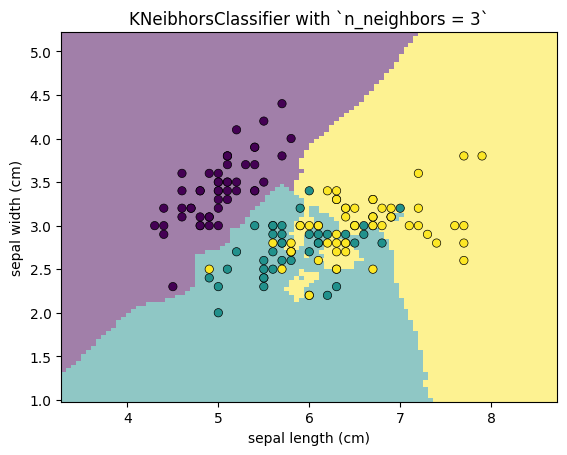

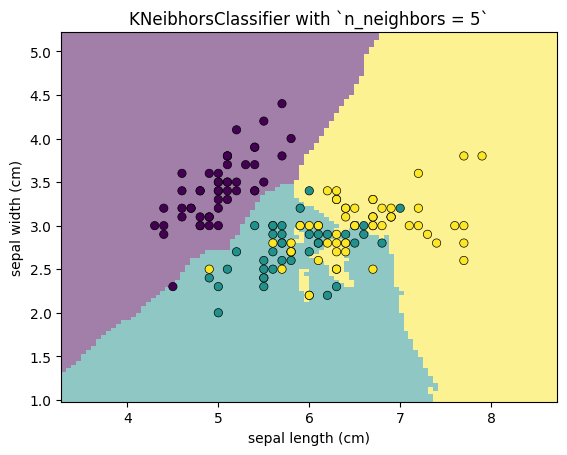

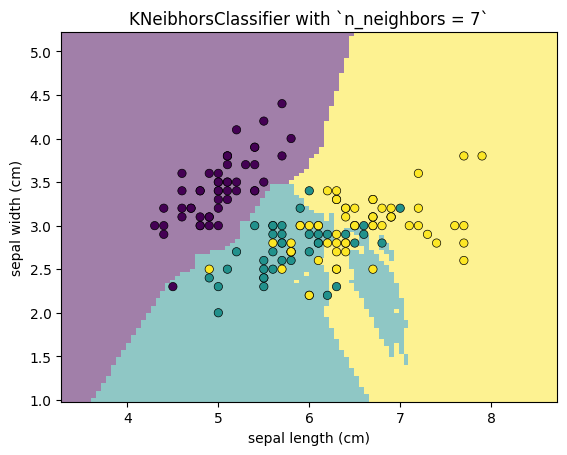

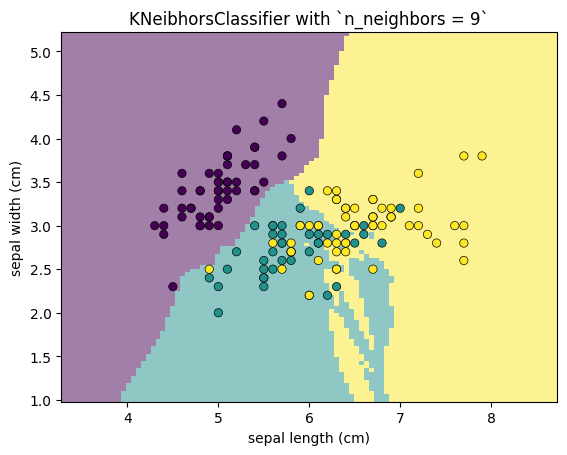

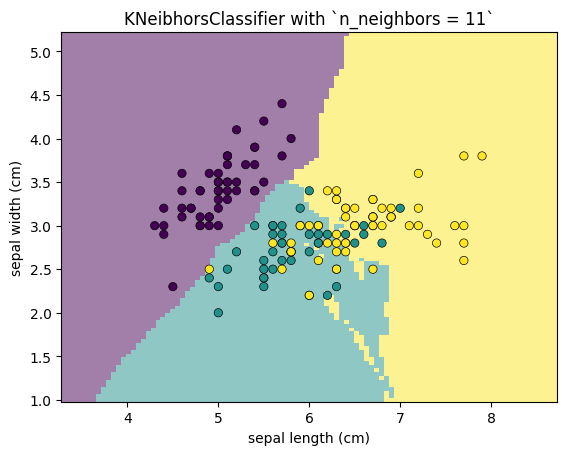

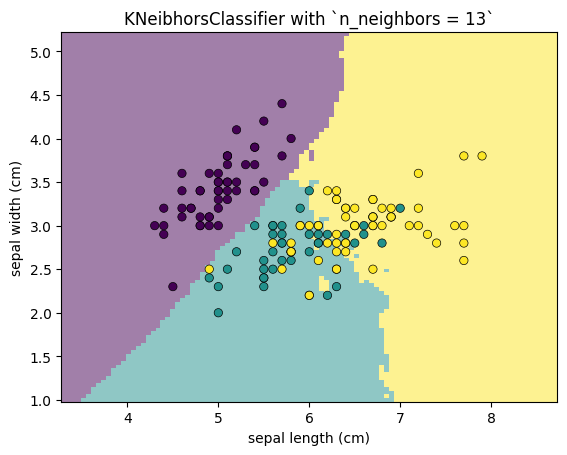

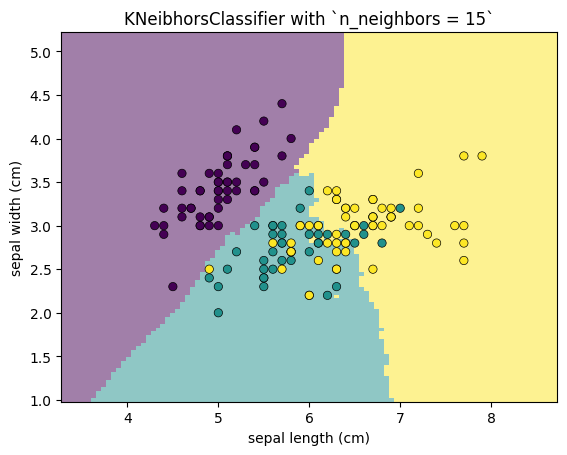

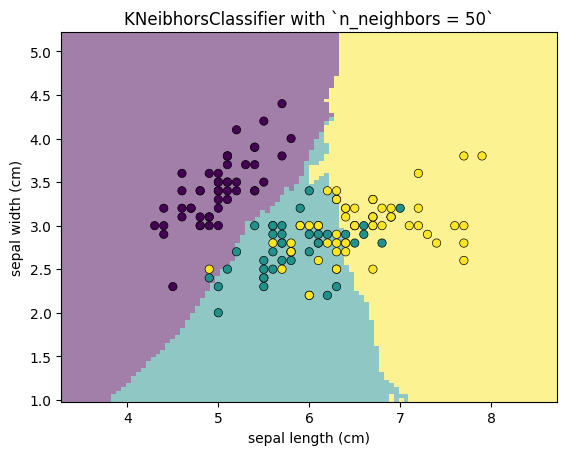

In [29]:
### Insert your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

for k in k_list:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X2, y_train)

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X2,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        alpha= 0.5,
        shading="auto",
        )

    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        # hue=iris.target_names[y],
        c = iris.target,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
            "KNeibhorsClassifier with `n_neighbors = %i`" % (k)
        )

    plt.show()